ESILV A5 DIA 3 - Mariyam CHEICK ISMAIL 
# Advance Machine Learning
## Practice Work 2 : Model optimisation

The goal is to select the best model and optimize it. 

### Load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
PATH = './datasets/data_immobilier.csv'

In [3]:
dataset = pd.read_csv(PATH)

In [4]:
dataset.sample(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
218,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,215000
1165,1166,20,RL,79.0,9541,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,233170
707,708,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
397,398,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,169500
263,264,50,RM,50.0,5500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,130000
530,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
893,894,20,RL,NaN,13284,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,165000


In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Preprocessing

In order to use models, we have to preprocess data of our dataset.
As the price distribution to be predicted is spread over several order of magnitude, we are going to work on the log of the price rather than the price to avoid too much sensitivity to outliers. 
It is also a great practice to apply this function in the summaries (very useful for linear regressions). 

As our dataset is composed of numerical values and also string (categorical) values, we are going to only approach numerical values into Gaussian distribution. String values will be considered as categorical values and as we cannot compute categorical values in our model, we are encoding these features. 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df = dataset.copy()
LE = LabelEncoder()

To dermine if a feature is following the normal distribution, we are going to analyse the skewness. 
In statistics, normality tests are used to determine whether a data set is modeled for normal distribution. Many statistical functions require that a distribution be normal or nearly normal. There are both graphical and statistical methods for evaluating normality:
- Graphical methods include the histogram and normality plot
- Statistically, two numerical measures of shape – *skewness and excess kurtosis* – can be used to test for normality. **If skewness is not close to zero, then your data set is not normally distributed.**

I have decided to take the skewness approach : 

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [9]:
skewness = {}
for col in df.columns: 
    if df[col].dtypes == 'O': 
        df[col] = df[col].astype('category')
        df[col] = LE.fit_transform(df[col])
    else: 
        skewness[col] = df.skew(numeric_only=None)[col]
    df = df.dropna(subset=[col])

<ipython-input-9-9e67f6732a51>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness[col] = df.skew(numeric_only=None)[col]


In [10]:
cols_to_normalize = []
for col in skewness: 
    if skewness[col] >= -0.5 and skewness[col] <= 0.5: 
        pass
    else: 
        cols_to_normalize.append(col)

In [11]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,3,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,3,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,2,0,3,0,...,0,3,2,1,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,2,3,3,0,...,0,3,4,3,0,8,2007,8,4,307000
8,9,50,4,51.0,6120,1,2,3,3,0,...,0,3,4,3,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,2,3,3,0,...,0,3,4,3,0,1,2008,8,4,118000
10,11,20,3,70.0,11200,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,129500


In [12]:
# log of non-normally dstributed features => avoids too much sensitivity to outliers
for col in cols_to_normalize: 
    df[col] = df[col].apply(lambda x : np.log(x) if x > 0 else 0)

In [13]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.094345,3,4.174387,9.041922,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,12.247694
1,2,2.995732,3,4.382027,9.169518,1,2,3,3,0,...,0.0,3,4,3,0.000000,5,2007,8,4,12.109011
2,3,4.094345,3,4.219508,9.328123,1,2,0,3,0,...,0.0,3,4,3,0.000000,9,2008,8,4,12.317167
3,4,4.248495,3,4.094345,9.164296,1,2,0,3,0,...,0.0,3,4,3,0.000000,2,2006,8,0,11.849398
4,5,4.094345,3,4.430817,9.565214,1,2,0,3,0,...,0.0,3,4,3,0.000000,12,2008,8,4,12.429216
5,6,3.912023,3,4.442651,9.554993,1,2,0,3,0,...,0.0,3,2,1,6.551080,10,2009,8,4,11.870600
6,7,2.995732,3,4.317488,9.218705,1,2,3,3,0,...,0.0,3,4,3,0.000000,8,2007,8,4,12.634603
8,9,3.912023,4,3.931826,8.719317,1,2,3,3,0,...,0.0,3,4,3,0.000000,4,2008,8,0,11.774520
9,10,5.247024,3,3.912023,8.911934,1,2,3,3,0,...,0.0,3,4,3,0.000000,1,2008,8,4,11.678440
10,11,2.995732,3,4.248495,9.323669,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,11.771436


### Feature importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

**Feature importance scores can provide insight into the dataset.** The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

**Feature importance scores can provide insight into the model.** Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

**Feature importance can be used to improve a predictive model.** This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

**Permutation feature importance** is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
def feature_importance(model, model_coef, X_train, y_train): 
    importance_info = list(zip(X_train.columns, model_coef))
    importance = pd.DataFrame(importance_info, columns=["feature", "importance"])
    results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error').importances_mean
    importance["by_permutation"] = results
    return importance

## Regression models 

In [16]:
# train & test split
X_train = df.sample(frac = 0.8, random_state = 25)
y_train = X_train["SalePrice"]
X_train = X_train.drop(["SalePrice"], axis=1)

X_test = df.drop(X_train.index)
y_test = X_test["SalePrice"]
X_test = X_test.drop(["SalePrice"], axis=1)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 80), (897,), (224, 80), (224,))

### Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"Train accuracy : {lr.score(X_train,y_train)}")
print(f"Test accuracy : {lr.score(X_test,y_test)}")

Train accuracy : 0.9195007495393277
Test accuracy : 0.8077954722634981


In [20]:
lr_importance = feature_importance(lr, lr.coef_, X_train, y_train)

<BarContainer object of 20 artists>

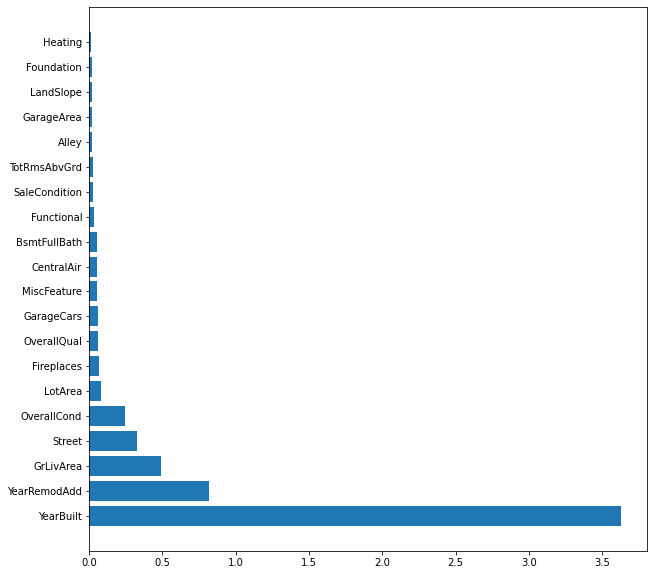

In [21]:
lr_importance = lr_importance.sort_values('importance', ascending=False)
pyplot.figure(figsize=(10, 10))
pyplot.barh(lr_importance.feature[:20], lr_importance.importance[:20])

<BarContainer object of 20 artists>

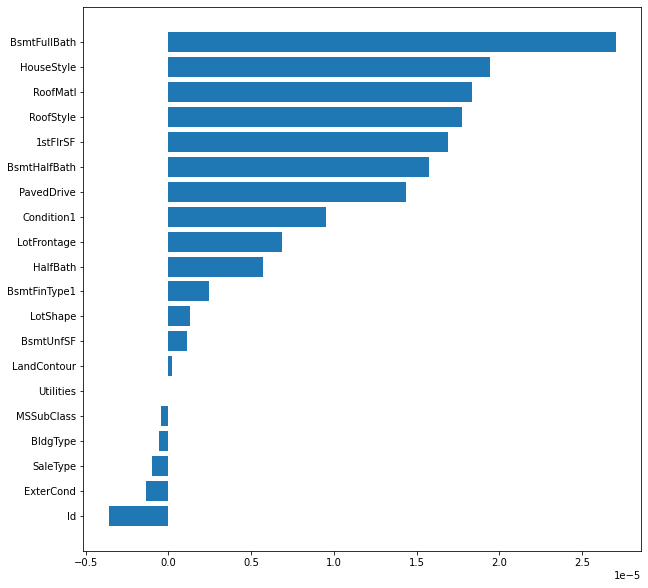

In [22]:
lr_importance = lr_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(lr_importance.feature[:20], lr_importance.by_permutation[:20])

### Random Forests

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(f"Train accuracy : {rf.score(X_train,y_train)}")
print(f"Test accuracy : {rf.score(X_test,y_test)}")

Train accuracy : 0.9819587542177781
Test accuracy : 0.8468287135540712


In [25]:
rf_importance = feature_importance(rf, rf.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

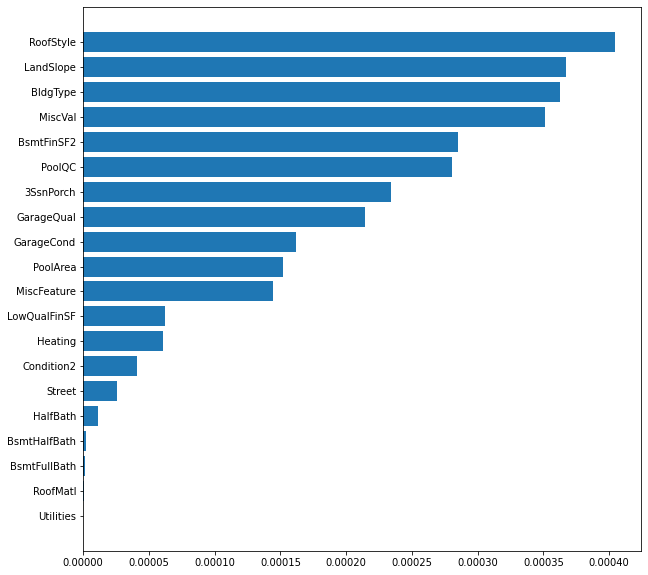

In [26]:
rf_importance = rf_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(rf_importance.feature[:20], rf_importance.importance[:20])

<BarContainer object of 20 artists>

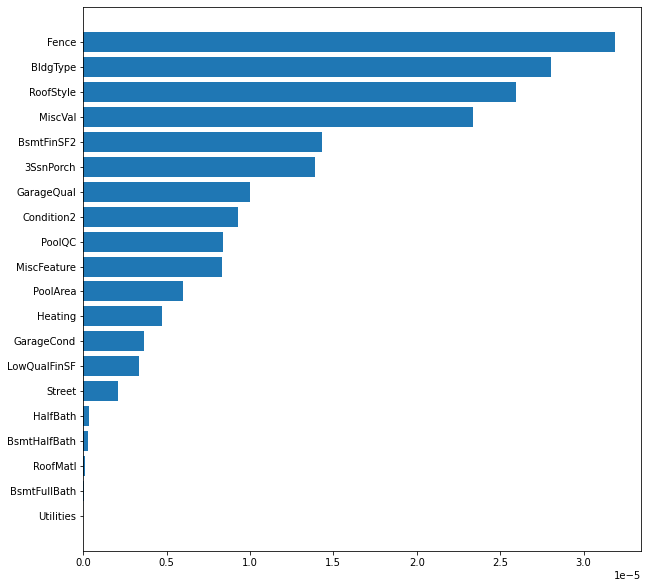

In [27]:
rf_importance = rf_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(rf_importance.feature[:20], rf_importance.by_permutation[:20])

### Random Forests with Cross-Validation and RandomSearch

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid,
    n_iter = 100, 
    scoring='neg_mean_absolute_error', 
    cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)


In [31]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

### RandomForest with GridSearch

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [4],
    'n_estimators': [550, 600, 650]
}

rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [4],
                         'n_estimators': [550, 600, 650]},
             return_train_score=True, verbose=2)

In [36]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [37]:
rf_grid = RandomForestRegressor(bootstrap = False, max_depth = 25, max_features = 'sqrt',
    min_samples_leaf = 1, min_samples_split = 4, n_estimators = 600)

rf_grid.fit(X_train, y_train)
print(f"Train accuracy : {rf_grid.score(X_train,y_train)}")
print(f"Test accuracy : {rf_grid.score(X_test,y_test)}")

Train accuracy : 0.9983039499663605
Test accuracy : 0.85371551355013


In [38]:
rf_grid_importance = feature_importance(rf_grid, rf_grid.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

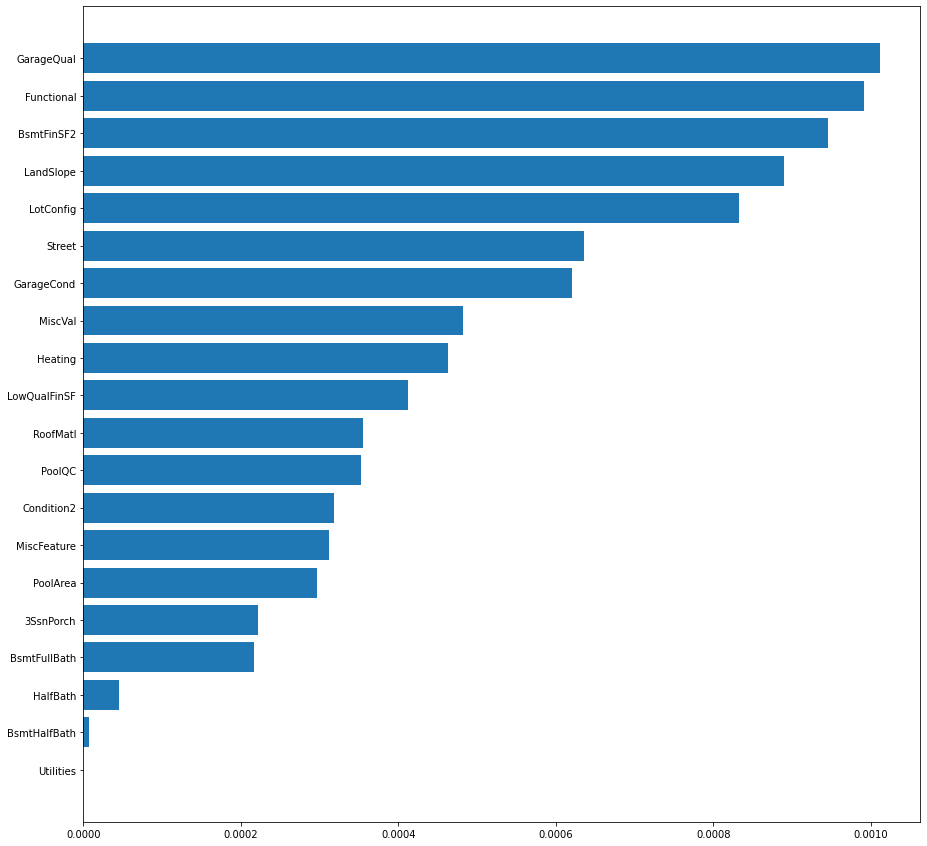

In [39]:
rf_grid_importance = rf_grid_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(rf_grid_importance.feature[:20], rf_grid_importance.importance[:20])

<BarContainer object of 20 artists>

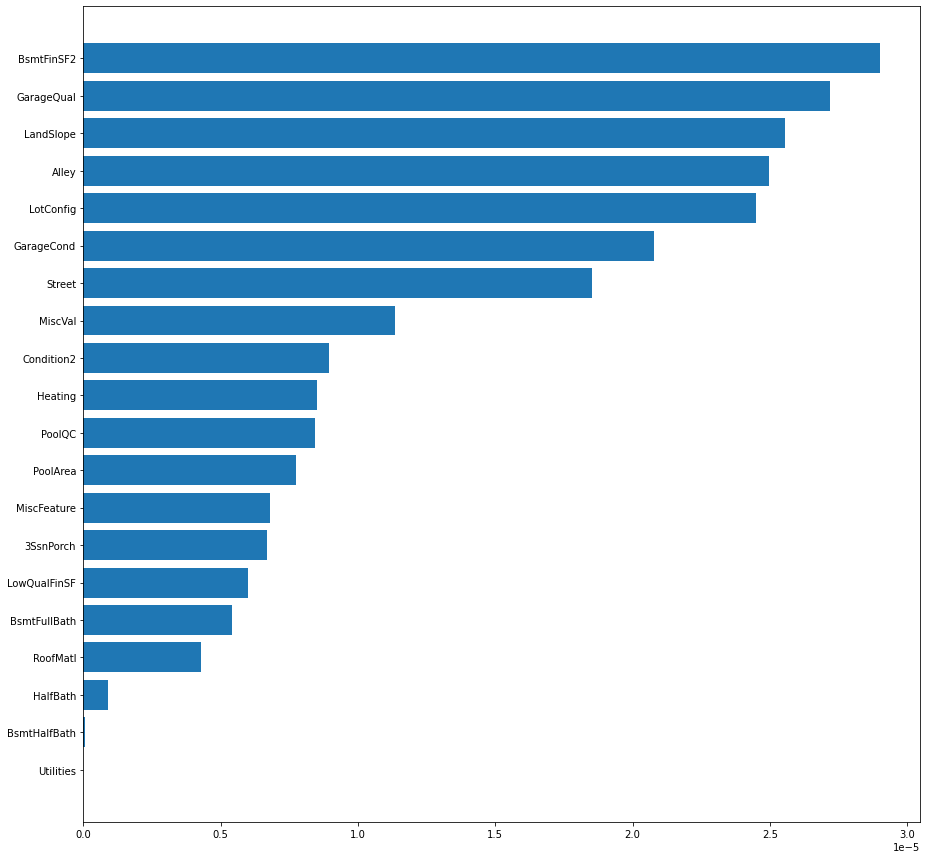

In [40]:
rf_grid_importance = rf_grid_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(rf_grid_importance.feature[:20], rf_grid_importance.by_permutation[:20])

### XGBoost

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(f"Train accuracy : {xgb.score(X_train,y_train)}")
print(f"Test accuracy : {xgb.score(X_test,y_test)}")

Train accuracy : 0.9998649521022465
Test accuracy : 0.8473847331683265


In [43]:
xgb_importance = feature_importance(xgb, xgb.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

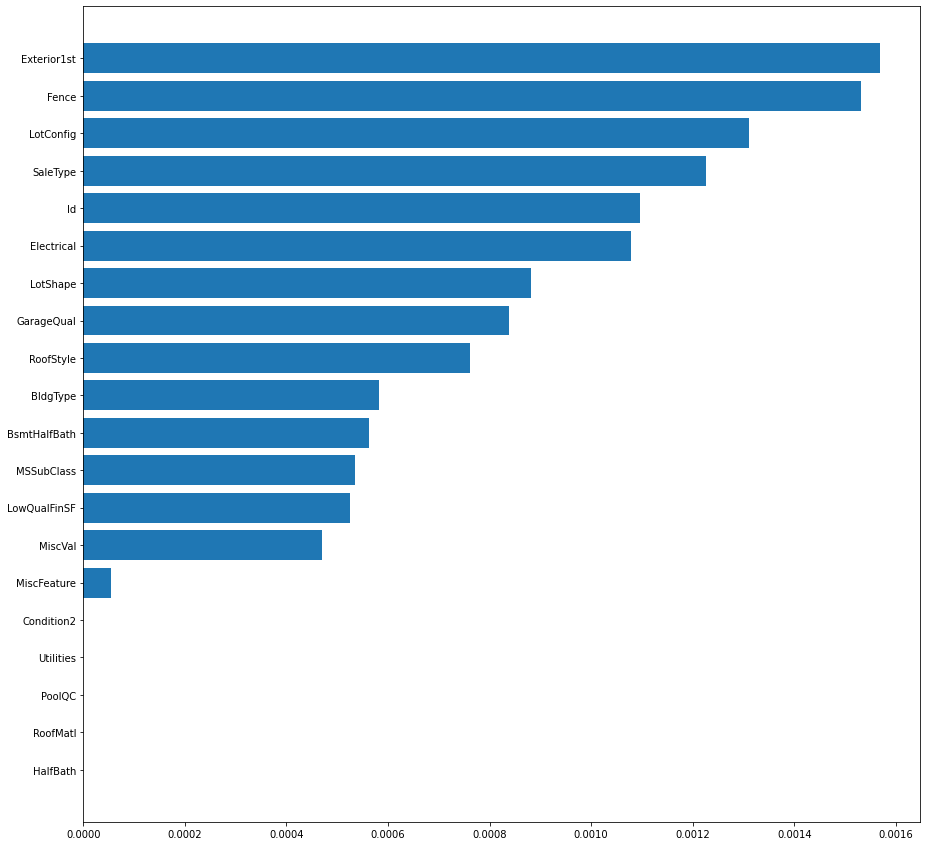

In [44]:
xgb_importance = xgb_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(xgb_importance.feature[:20], xgb_importance.importance[:20])

<BarContainer object of 20 artists>

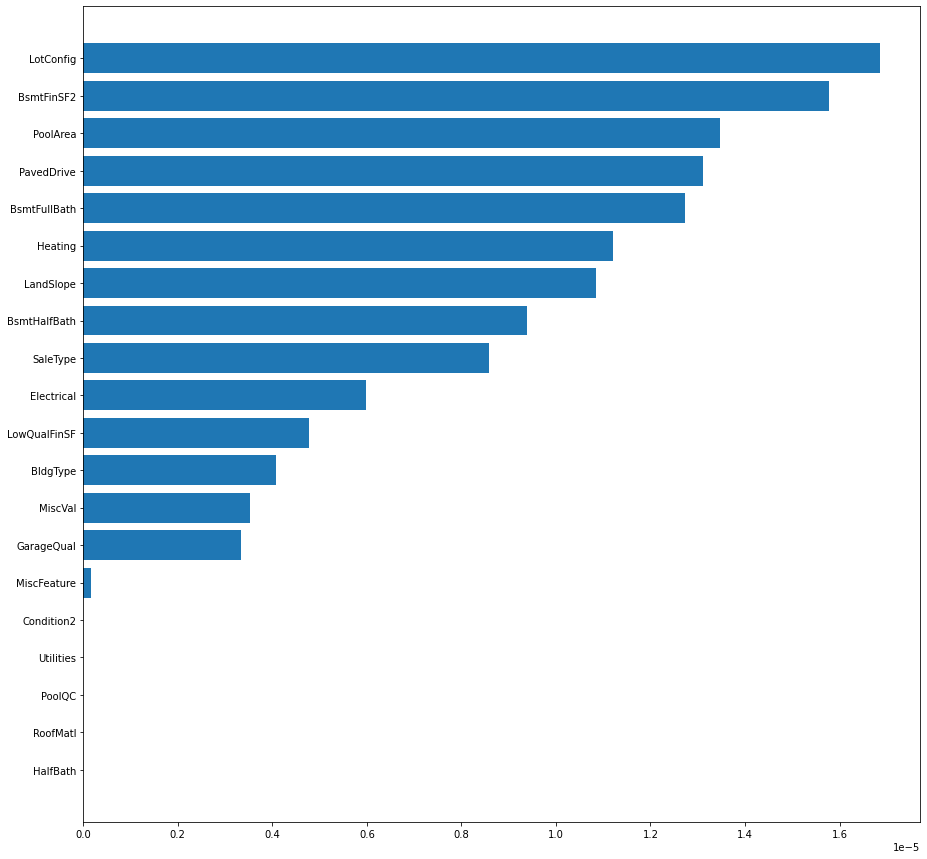

In [45]:
xgb_importance = xgb_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(xgb_importance.feature[:20], xgb_importance.by_permutation[:20])

### Feature selection
#### RFE : Recursive Feature Elimination

**Recursive Feature Elimination**, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.

In [46]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score

As the scores are higher for XGBoost, I am going to use this model for the next steps

In [47]:
# create pipeline
rfe = RFE(estimator = XGBRegressor(), n_features_to_select = 15)
model = XGBRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [48]:
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.103 (0.010)


We have a Mean Absolute Error close to 0 which is great, our model predictions are not far from the wanted values. In order to choose the right number of features to be selected, we are going to make loops (As we saw in previous plots, having less than 15 features is not really ideal but for test purposes as the fits are taking lots of time I stopped to 19 features to be selected, the ideal should be all features (until 80 in our case))

In [49]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(15, 20):
        rfe = RFE(estimator = XGBRegressor(), n_features_to_select = i)
        model = XGBRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()

In [50]:
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>15 -0.103 (0.010)
>16 -0.101 (0.010)
>17 -0.101 (0.010)
>18 -0.102 (0.009)
>19 -0.100 (0.010)


{'whiskers': [<matplotlib.lines.Line2D at 0x255d392f820>,
 'caps': [<matplotlib.lines.Line2D at 0x255d392fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x255d38bd8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x255d394f4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x255d394fc10>,
 'means': [<matplotlib.lines.Line2D at 0x255d394f880>,
  <matplotlib.lines.Line2D at 0x255d38d2a90>]}

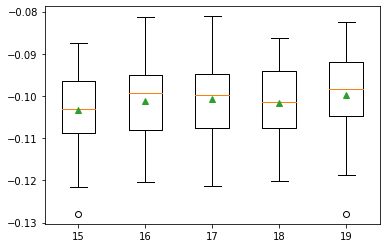

In [51]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

#### SelectFromModel

In [52]:
from sklearn.feature_selection import SelectFromModel

In [53]:
selector = SelectFromModel(estimator=XGBRegressor())
selector.fit(X_train, y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       learning_rate=None, max_delta_step=None,
                                       max_depth=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       random_state=None, reg_alpha=None,
                                       reg_lambda=None, scale_pos_weight=None,
                                       subsample=None, tree_met

In [64]:
selector.estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<BarContainer object of 20 artists>

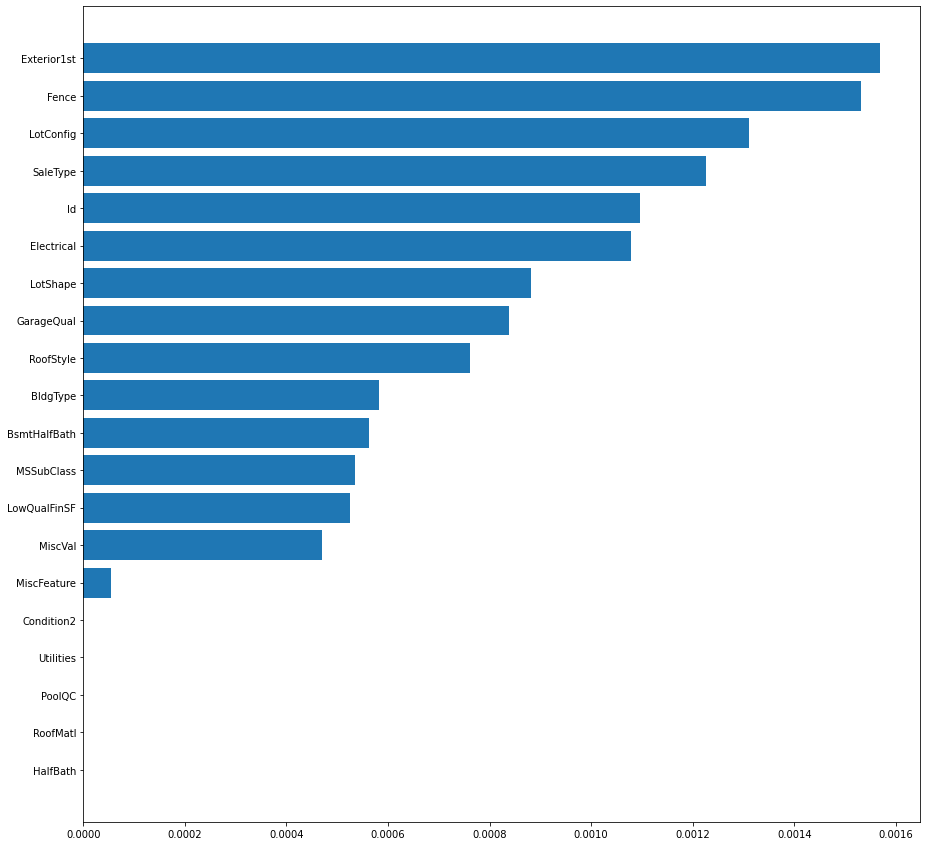

In [67]:
sfm_xgb_importance = feature_importance(selector.estimator_, selector.estimator_.feature_importances_, X_train, y_train)

sfm_xgb_importance = sfm_xgb_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(sfm_xgb_importance.feature[:20], sfm_xgb_importance.importance[:20])

<BarContainer object of 20 artists>

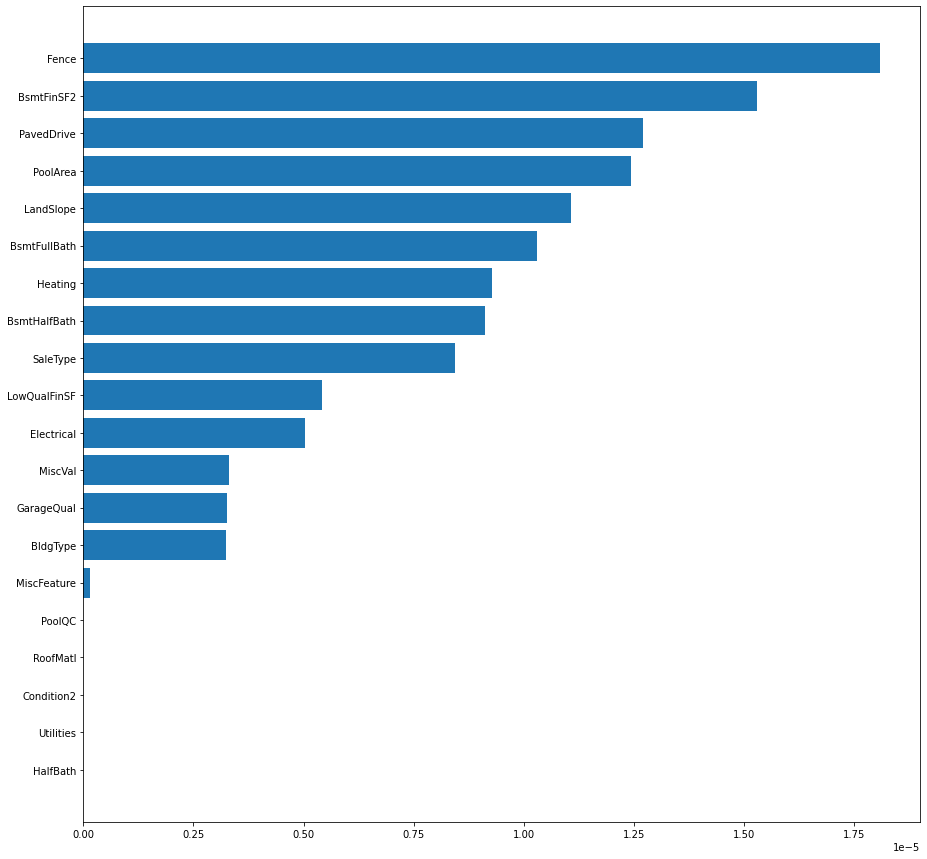

In [71]:
sfm_xgb_importance = sfm_xgb_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(sfm_xgb_importance.feature[:20], sfm_xgb_importance.by_permutation[:20])

#### Sequential Feature Selector

In [55]:
from sklearn.feature_selection import SequentialFeatureSelector

In [58]:
xgb = XGBRegressor()

In [59]:
feature_names = np.array(X_train.columns)

In [60]:
sfs_forward = SequentialFeatureSelector(
    xgb, n_features_to_select=20, direction="forward"
).fit(X_train, y_train)

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)

Features selected by forward sequential selection: ['LandContour' 'Utilities' 'Neighborhood' 'Condition2' 'OverallQual'
 'OverallCond' 'YearBuilt' 'BsmtFinType1' 'BsmtFinSF1' 'CentralAir'
 '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'Fireplaces'
 'GarageType' 'GarageCars' 'ScreenPorch' 'PoolQC' 'MiscFeature']


These are the features that are selected by the forward feature selection. 

In [61]:
sfs_backward = SequentialFeatureSelector(
    xgb, n_features_to_select=20, direction="backward"
).fit(X_train, y_train)

print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)

Features selected by backward sequential selection: ['MSZoning' 'LotArea' 'LandContour' 'Neighborhood' 'Condition1'
 'OverallQual' 'OverallCond' 'YearBuilt' 'Exterior2nd' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinSF2' 'TotalBsmtSF' 'CentralAir' 'GrLivArea'
 'KitchenAbvGr' 'GarageFinish' 'GarageCars' 'YrSold' 'SaleCondition']


These are the features that are selected by the backward feature selection. 

#### Testing model with feature selection

In [75]:
X_train = X_train[feature_names[sfs_backward.get_support()]]
X_test = X_test[feature_names[sfs_backward.get_support()]]

In [76]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(f"Train accuracy : {xgb.score(X_train,y_train)}")
print(f"Test accuracy : {xgb.score(X_test,y_test)}")

Train accuracy : 0.9995195871745318
Test accuracy : 0.8531016467732041


The accuracy for the test set is a little bit better than before feature selection. 

Let's tune our model

In [77]:
# By default, the booster is gbtree
xgb_tuned = XGBRegressor(booster = 'gblinear')

In [78]:
xgb_tuned.fit(X_train, y_train)
print(f"Train accuracy : {xgb_tuned.score(X_train,y_train)}")
print(f"Test accuracy : {xgb_tuned.score(X_test,y_test)}")

Train accuracy : 0.7106689098788105
Test accuracy : 0.6982771049701624


As we have chosen XGBoost model, we don't have much tuning possibilities, but we can see that it is better to have a GBTree booster rather than a GBLinear one. 